In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from least_squares import *

def find_major_value_array(arr: list) -> int:
    major = arr[0][0]
    
    for k in arr:
        if k[0] > major:
            major = k[0]
            
    return int(major + 10)
    
def find_minor_value_array(arr: list) -> int:
    minor = arr[0][0]
    
    for k in arr:
        if k[0] < minor:
            minor = k[0]
            
    return int(minor - 10)
    
def plot_methods(file: str):
    file_data = pd.read_csv(file, delim_whitespace=True)

    points = build_points(file_data)
    data = build_data(file_data)
    
#     print(points,'\n',data)
    
    x_major = find_major_value_array(points[0])
    x_minor = find_minor_value_array(points[0])
    
    y_major = find_major_value_array(points[1])
    y_minor = find_minor_value_array(points[1])

    l = linear(data)
    q = quadratic(data)
    
#     print(q)

    plt.title(file[5:-4])
    plt.scatter(points[0],points[1], c='r')
    plt.plot(l[0],l[1], label='normal')
    plt.plot(q[0],q[1], label='quadratic')
    plt.xlim(x_minor,x_major)
    plt.ylim(y_minor,y_major)
    plt.legend()

Beta:  [[-3783.9455909089884], [2.025302727272731]]
Beta:  [[32294.01736307144], [-34.98747000005096], [0.009490454545471039]]


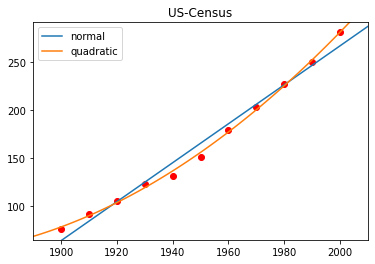

In [4]:
plot_methods("data/US-Census.txt")

Beta:  [[155.29648345697024], [1.9017835240176737]]
Beta:  [[140.82726245792583], [3.047592598653864], [-0.02237667361350759]]


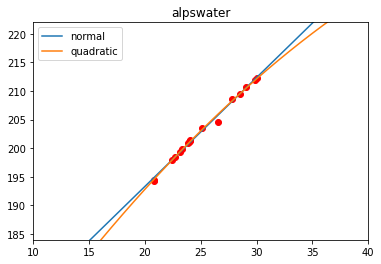

In [3]:
plot_methods("data/alpswater.txt")

Beta:  [[37.91187707027177], [3.953789268092592], [1.265105680742323]]


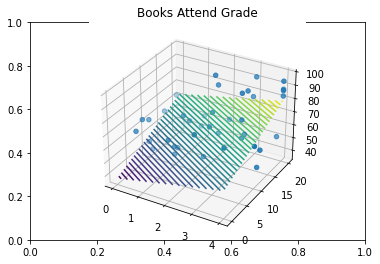

In [12]:
# dataset with 3 cols
books_data = pd.read_csv("data/Books_attend_grade.txt", delim_whitespace=True)
    
data = build_data(books_data)
aux = lambda x,y: 1.28348 * y + 4.03689 * x + 37.3792

l = linear(data)
x = np.linspace(0, 4, 10)
y = np.linspace(0, 20, 10)

# print(y)

plt.figure()
plt.title('Books Attend Grade')
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(x, y)
Z = aux(X, Y)
ax.scatter3D(books_data.iloc[:,0], books_data.iloc[:,1], books_data.iloc[:,2],cmap='viridis')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
plt.show()